# Image Similarity Model

Bandcamp is an online music distribution platform. Artists and labels upload music to Bandcamp where they have the ability to set prices and add merchandise. Users can download purchases or stream tracks via the mobile app. Labels can offer sale of physical items: vinyl, cassettes, and CDs. The website also allows users to extend support to sellers by choosing to pay more then the sale price.

Visual arts usually complement music projects by reinforcing concepts. Even though bandcamp is fundamentally a market for audio, album art are presented and are often seen before music is heard. 

As a first step on this process I would first like to focus on creating a model for clustering similar artworks.

## Imports

In [3]:
import pandas as pd
import numpy as np
from skimage import io
import matplotlib.pyplot as plt


## Data read and transformation

[Click here for raw data.](https://www.kaggle.com/code/mathurinache/bandcamp-dataset-starter/data)

Having read the data. New columns were created to show the absolute and percentage amounts over paid by the customers for each project. A sample was created to reduce the time taken to create the notebook. Once a working pipeline is built we can rerun the notebook cells with the complete dataset.

In [4]:
df = pd.read_csv(
    "1000000-bandcamp-sales.csv", sep=",", 
    usecols=['art_url','item_type','item_price','amount_paid']
    )

df["item_price"] = df["item_price"].round(2)
df.drop(df.index[df["item_price"] == 0], inplace=True) #free projects are dropped from the dataframe.

df["amount_paid_over"] = df["amount_paid"] - df["item_price"]
df.drop(df.index[df["amount_paid_over"] == 0], inplace=True) #dropped all transactions where the customer did not overpay.

df = df[df["art_url"].str.contains("//s4.bcbits.com/img/blank.gif")==False] #these URLs caused problems so I thought best to remove them now.

df.drop("amount_paid", axis=1, inplace=True)
df["perc_overpaid"] = (df["amount_paid_over"]/df["item_price"]) * 100
df["perc_overpaid"] = df["perc_overpaid"].round(2)

df = df.sample(n=1000)
df = df.reset_index()
df


,index,art_url,item_type,item_price,amount_paid_over,perc_overpaid
0,305423,https://f4.bcbits.com/img/a4056204562_7.jpg,a,4.00,6.00,150.00
1,961310,https://f4.bcbits.com/img/0021843152_37.jpg,p,18.00,2.00,11.11
2,213392,https://f4.bcbits.com/img/a4279445208_7.jpg,a,10.00,2.50,25.00
3,626765,https://f4.bcbits.com/img/0021687222_37.jpg,p,0.50,2.50,500.00
4,443421,https://f4.bcbits.com/img/a1627907290_7.jpg,t,1.49,0.51,34.23
...,...,...,...,...,...,...
995,720124,https://f4.bcbits.com/img/a3971369593_7.jpg,a,3.00,2.00,66.67
996,206991,https://f4.bcbits.com/img/0021156040_37.jpg,p,19.99,0.01,0.05
997,298646,https://f4.bcbits.com/img/a3652191537_7.jpg,a,7.00,3.00,42.86
998,968425,https://f4.bcbits.com/img/a4114949780_7.jpg,a,5.00,-2.00,-40.00


(-0.5, 149.5, 149.5, -0.5)

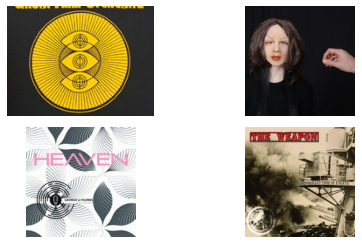

In [11]:
samp = df.sample(4)
samp_img = []
for x in samp["art_url"]:
    samp_img.append(io.imread(x))

f, axarr = plt.subplots(2,2)
axarr[0, 0].imshow(samp_img[0])
axarr[0, 0].axis("off")
axarr[0, 1].imshow(samp_img[1])
axarr[0, 1].axis("off")
axarr[1, 0].imshow(samp_img[2])
axarr[1, 0].axis("off")
axarr[1, 1].imshow(samp_img[3])
axarr[1, 1].axis("off")

Everytime the code cell above is run 4 new examples are taken from the dataset.

In [24]:
from keras.applications.vgg16 import preprocess_input
from  import load_img 
from keras.preprocessing.image import img_to_array

from keras.applications.vgg16 import VGG16
from keras.models import Model

model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

def extract_features(file, model):
    # load img
    img = load_img(file, target_size=(224, 224))
    # convert to numpy array
    img = np.array(img)
    # reshape the data for the model
    reshaped_img = img.reshape(1, 224, 224, 3)
    # prepare image
    imgx = preprocess_input(reshaped_img)
    # extract features
    features = model.predict(imgx, use_multiprocessing=True)
    
    return features


ImportError: cannot import name 'load_img' from 'keras' (c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\__init__.py)